In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0'

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
from  shutil import copyfile
import random
import zipfile

In [5]:
try:
    shutil.rmtree('Data\\dogs-vs-cats\\')
except:
    print("Directory Does not exists")

In [9]:
# This code block unzips the full Cats-v-Dogs dataset to /tmp
# which will create a tmp/PetImages directory containing subdirectories
# called 'Cat' and 'Dog' (that's how the original researchers structured it)
path_cats_and_dogs ='Data\\dogs-vs-cats.zip'


local_zip = path_cats_and_dogs
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('Data\\dogs-vs-cats\\')
zip_ref.close()

In [10]:
test_path_cats_and_dogs ='Data\\dogs-vs-cats\\test1.zip'


local_zip = test_path_cats_and_dogs
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('Data\\dogs-vs-cats\\')
zip_ref.close()

In [11]:
train_path_cats_and_dogs ='Data\\dogs-vs-cats\\train.zip'


local_zip = train_path_cats_and_dogs
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('Data\\dogs-vs-cats\\')
zip_ref.close()

In [5]:
BASE_PATH = 'Data\\dogs-vs-cats\\train\\'
TRAIN_PATH='Data\\dogs-vs-cats\\train_data\\'
VAL_PATH='Data\\dogs-vs-cats\\validation_data\\'

In [13]:

try:
    shutil.rmtree(TRAIN_PATH)
    shutil.rmtree(VAL_PATH)
except:
    print("Directory does not exists")

In [14]:
os.mkdir(TRAIN_PATH)
os.mkdir(VAL_PATH)
train_dog=os.path.join(TRAIN_PATH , 'dog')
train_cat=os.path.join(TRAIN_PATH , 'cat')
val_dog=os.path.join(VAL_PATH , 'dog')
val_cat=os.path.join(VAL_PATH , 'cat')
print(train_cat)
os.mkdir(train_dog)
os.mkdir(train_cat)
os.mkdir(val_dog)
os.mkdir(val_cat)

C:\Data\CV\dogs-vs-cats\train_data\cat


In [15]:
#segregating cats and dog files for training and validation
cat_file_list=[]
dog_file_list=[]
for file in os.listdir(BASE_PATH):
    if file[:3]=='cat':
        cat_file_list.append(file)
    elif file[:3]=='dog':
        dog_file_list.append(file)
#shuffling the list


In [16]:
train_split=0.8

random.sample(cat_file_list, len(cat_file_list))
random.sample(dog_file_list, len(dog_file_list))
num_of_training_files_cat= int(len(cat_file_list)* train_split)
num_of_training_files_dog= int(len(dog_file_list)* train_split)
print("Total training cat files", num_of_training_files_cat)
print("Training files dog", num_of_training_files_dog)
print("Total filess", len(cat_file_list) + len(dog_file_list) )
print("Total val Dog files", len(dog_file_list) - num_of_training_files_dog)
print("Total val Cat files", len(dog_file_list) - num_of_training_files_cat)
for file in cat_file_list[:num_of_training_files_cat]:
   copyfile(os.path.join(BASE_PATH, file), os.path.join(train_cat, file))
   
for file in cat_file_list[num_of_training_files_cat:]:
   copyfile(os.path.join(BASE_PATH, file), os.path.join(val_cat, file))

for file in dog_file_list[:num_of_training_files_dog]:
   copyfile(os.path.join(BASE_PATH, file), os.path.join(train_dog, file))
   
for file in dog_file_list[num_of_training_files_dog:]:
   copyfile(os.path.join(BASE_PATH, file), os.path.join(val_dog, file))
    
    

Total training cat files 10000
Training files dog 10000
Total filess 25000
Total val Dog files 2500


In [ ]:
print("Total training cat files", num_of_training_files_cat)
print("Training files dog", num_of_training_files_dog)
print("Total filess", len(cat_file_list) + len(dog_file_list) )
print("Total val Dog files", len(dog_file_list) - num_of_training_files_dog)
print("Total val Cat files", len(dog_file_list) - num_of_training_files_cat)

In [17]:
print("Total val Dog files", len(dog_file_list) - num_of_training_files_dog)

Total val Dog files 2500


In [6]:
batch_size = 32 #128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [7]:
train_image_generator = ImageDataGenerator(
                                                rescale=1./255,
                                                rotation_range=45,
                                                width_shift_range=.15,
                                                height_shift_range=.15,
                                                horizontal_flip=True,
                                                vertical_flip=True,
                                                zoom_range=0.3                         

                                            ) # Generator for our training data

In [8]:
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=TRAIN_PATH,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=VAL_PATH,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [17]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

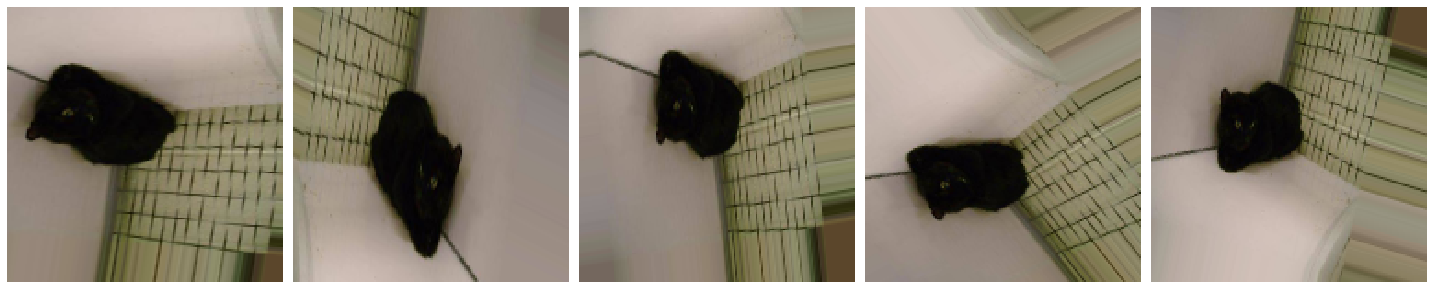

In [18]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [19]:
sample_training_images, _ = next(train_data_gen)

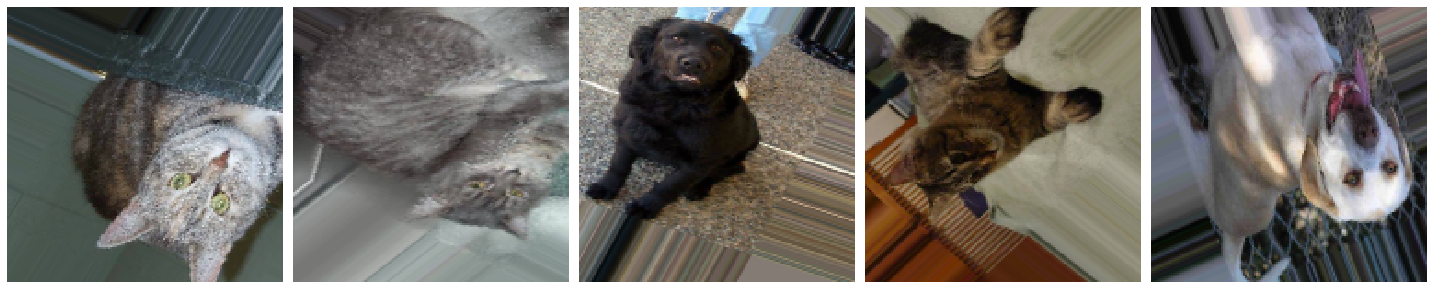

In [20]:
plotImages(sample_training_images[:5])

In [116]:
#Build the model
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),              metrics=['accuracy'])

In [117]:
epochs=50
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=1000,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=1000
)

Epoch 1/50
1000/1000 [==============================] - 271s 271ms/step - loss: 0.7039 - accuracy: 0.4984 - val_loss: 0.6932 - val_accuracy: 0.5003
Epoch 2/50
1000/1000 [==============================] - 255s 255ms/step - loss: 0.6932 - accuracy: 0.4993 - val_loss: 0.7110 - val_accuracy: 0.5003
Epoch 3/50
1000/1000 [==============================] - 254s 254ms/step - loss: 0.6885 - accuracy: 0.5295 - val_loss: 0.6772 - val_accuracy: 0.5765
Epoch 4/50
1000/1000 [==============================] - 254s 254ms/step - loss: 0.6564 - accuracy: 0.6120 - val_loss: 0.5983 - val_accuracy: 0.6933
Epoch 5/50
1000/1000 [==============================] - 252s 252ms/step - loss: 0.6255 - accuracy: 0.6596 - val_loss: 0.5769 - val_accuracy: 0.7175
Epoch 6/50
1000/1000 [==============================] - 250s 250ms/step - loss: 0.5922 - accuracy: 0.6960 - val_loss: 0.5670 - val_accuracy: 0.7234
Epoch 7/50
1000/1000 [==============================] - 254s 254ms/step - loss: 0.5842 - accuracy: 0.7065 - val_

## Tansfer learning

In [118]:
from tensorflow.python.keras.applications import imagenet_utils
from tensorflow.python.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import   DenseNet121
from tensorflow.python.keras.applications.densenet import preprocess_input
# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.DenseNet121(input_shape=(IMG_WIDTH, IMG_HEIGHT,3),
                                               include_top=False,
                                               weights='imagenet')

In [119]:
base_model.trainable = False

In [120]:
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 156, 156, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 75, 75, 64)   9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [121]:
print(len(base_model.layers))

427


In [122]:

x=base_model.output
x=Flatten()(x)
x=Dense(512,activation='relu')(x) #dense layer 3
output=Dense(2,activation='softmax')(x) #final layer with softmax activation


In [123]:
from tensorflow.keras.models import Model
model=Model(inputs=base_model.input,outputs=output)

In [124]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 156, 156, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 75, 75, 64)   9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1/conv[0][0]                 
____________________________________________________________________________________________

conv4_block9_0_relu (Activation (None, 9, 9, 512)    0           conv4_block9_0_bn[0][0]          
__________________________________________________________________________________________________
conv4_block9_1_conv (Conv2D)    (None, 9, 9, 128)    65536       conv4_block9_0_relu[0][0]        
__________________________________________________________________________________________________
conv4_block9_1_bn (BatchNormali (None, 9, 9, 128)    512         conv4_block9_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block9_1_relu (Activation (None, 9, 9, 128)    0           conv4_block9_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block9_2_conv (Conv2D)    (None, 9, 9, 32)     36864       conv4_block9_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_bloc

In [125]:
# or if we want to set the first 20 layers of the network to be non-trainable
TRAINABLE_LAYERS= len(model.layers)-len(base_model.layers)+5
print(TRAINABLE_LAYERS)
for layer in model.layers[:-TRAINABLE_LAYERS]:
    layer.trainable=False
for layer in model.layers[-TRAINABLE_LAYERS:]:
    layer.trainable=True

8


In [127]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 156, 156, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 75, 75, 64)   9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [18]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=2e-5), metrics=['acc'])

In [31]:
#batch_size=32
epochs=20
step_size_train=train_data_gen.n//train_data_gen.batch_size
print(step_size_train)
print(train_data_gen.n)

history =model.fit_generator(generator=train_data_gen,
                   steps_per_epoch=step_size_train,
                   epochs=epochs)

625
20000
Epoch 1/20
625/625 [==============================] - 178s 285ms/step - loss: 0.3223 - acc: 0.8633
Epoch 2/20
625/625 [==============================] - 179s 287ms/step - loss: 0.2790 - acc: 0.8794
Epoch 3/20
625/625 [==============================] - 178s 285ms/step - loss: 0.2676 - acc: 0.8885
Epoch 4/20
625/625 [==============================] - 178s 285ms/step - loss: 0.2569 - acc: 0.8884
Epoch 5/20
625/625 [==============================] - 177s 283ms/step - loss: 0.2403 - acc: 0.8984
Epoch 6/20
625/625 [==============================] - 176s 281ms/step - loss: 0.2348 - acc: 0.9003
Epoch 7/20
625/625 [==============================] - 175s 280ms/step - loss: 0.2295 - acc: 0.9011
Epoch 8/20
625/625 [==============================] - 176s 282ms/step - loss: 0.2239 - acc: 0.9046
Epoch 9/20
625/625 [==============================] - 180s 288ms/step - loss: 0.2191 - acc: 0.9089
Epoch 10/20
625/625 [==============================] - 177s 283ms/step - loss: 0.2078 - acc: 0.9145

In [35]:
model.save('model_transfer_20.h5')

In [19]:
model.load_weights('model_transfer_20.h5')

In [20]:
#save your model in the SavedModel format
export_dir = 'saved_model'
tf.saved_model.save(model, export_dir)
# Converting a SavedModel to a TensorFlow Lite model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model\assets


In [21]:
optimize="Speed"
if optimize=='Speed':
    converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_LATENCY]
elif optimize=='Storage':
     converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
else:    
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
#reduce the size of a floating point model by quantizing the weights to float16
converter.target_spec.supported_types = [tf.float16]
tflite_quant_model = converter.convert()

In [22]:
open("model_tl.tflite", "wb").write(tflite_model)
open("model_quant_tl.tflite", "wb").write(tflite_quant_model)

30821348

In [23]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_quant_model)
interpreter.allocate_tensors()
#get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


In [107]:
import cv2
import tflite_runtime.interpreter as tflite
# Read the image and decode to a tensor
image_path='Data\\dogs-vs-cats\\test1\\151.jpg' 
img = cv2.imread(image_path)
img = cv2.resize(img,(IMG_WIDTH,IMG_HEIGHT))
#Preprocess the image to required size and cast
input_shape = input_details[0]['shape']
input_tensor= np.array(np.expand_dims(img,0), dtype=np.float32)


In [108]:
#set the tensor to point to the input data to be inferred
input_index = interpreter.get_input_details()[0]["index"]
interpreter.set_tensor(input_index, input_tensor)
#Run the inference
interpreter.invoke()
output_details = interpreter.get_output_details()

In [109]:
output_details

[{'name': 'Identity',
  'index': 0,
  'shape': array([1, 2]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)}]

In [110]:
prediction = interpreter.get_tensor(output_details[0]['index'])[0]
print((prediction).astype(float))


[3.38194556e-10 1.00000000e+00]


In [111]:
output_data = interpreter.get_tensor(output_details[0]['index'])
results = np.squeeze(output_data)

top_k = results.argsort()

print(results)
top_k
print(top_k)

[3.3819456e-10 1.0000000e+00]
[0 1]


In [112]:
_, top_k_indices=tf.math.top_k(output_data, k= 2)
top_k_indices=np.array(top_k_indices)[0]
top_k_indices

array([1, 0])

In [113]:
for label, idx in train_data_gen.class_indices.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if top_k[idx]==1:
        print(label, idx, top_k[idx])

dog 1 1


In [114]:
train_data_gen.class_indices

{'cat': 0, 'dog': 1}

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
def load_image(img_path, show=False):

    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
    img_tensor = tf.keras.preprocessing.image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor
  
#img_path = 'C:/Users/Ferhat/Python Code/Workshop/Tensoorflow transfer learning/blue_tit.jpg'
img_path='Data\\dogs-vs-cats\\test1\\137.jpg' 
new_image = load_image(img_path)

pred = model.predict(new_image)
pred

array([[5.5706005e-22, 1.0000000e+00]], dtype=float32)

In [39]:
pred

array([[5.5706005e-22, 1.0000000e+00]], dtype=float32)